### **Exercise 1: Estimating Errors from Random Data Samples**

In [58]:
import numpy as np
from scipy.stats import norm as norm, beta as beta_dis
import matplotlib.pyplot as plt

#### **Problem 0: Generating Random Data following Uniform, Normal and Beta Distributions**

In the following cells, we generate random data using Uniform, Normal, and Beta distributions. You can experiment with different parameters to observe how each distribution changes. Adjusting the sample size also allows you to see how the calculated statistics converge toward their theoretical values as the sample grows.   
Use this notebook to get familiar with the distributions and to verify the quality of the different random samples.

##### **Problem 0.1: Generating Random Data following a Unfiform Distribution**

For a random variable $X \sim \text{Uniform}(a,b)$, the theoretical properties are:

**Expected Value (Mean):**
$$E[X] = \frac{a + b}{2}$$

**Variance:**
$$\text{Var}(X) = \frac{(b - a)^2}{12}$$

**Probability Density Function (PDF):**
$$f(x) = \begin{cases} 
\frac{1}{b-a} & \text{if } a \leq x \leq b \\
0 & \text{otherwise}
\end{cases}$$

**Cumulative Distribution Function (CDF):**
$$F(x) = \begin{cases} 
0 & \text{if } x < a \\
\frac{x - a}{b - a} & \text{if } a \leq x \leq b \\
1 & \text{if } x > b
\end{cases}$$

In [59]:
# generator of uniform random samples

# a lower bound 
# b upper bound
# N number of samples
# nrep number of repetitions

def uniform_random_sample(a, b, N, nrep):
    return np.random.uniform(a, b, (nrep, N))

In [60]:
N = 1000000  # size of the sample
nrep = 1     # number of repetitions
a = -1/2     # lower bound
b = 1/2      # upper bound

data = uniform_random_sample(a, b, N, nrep)

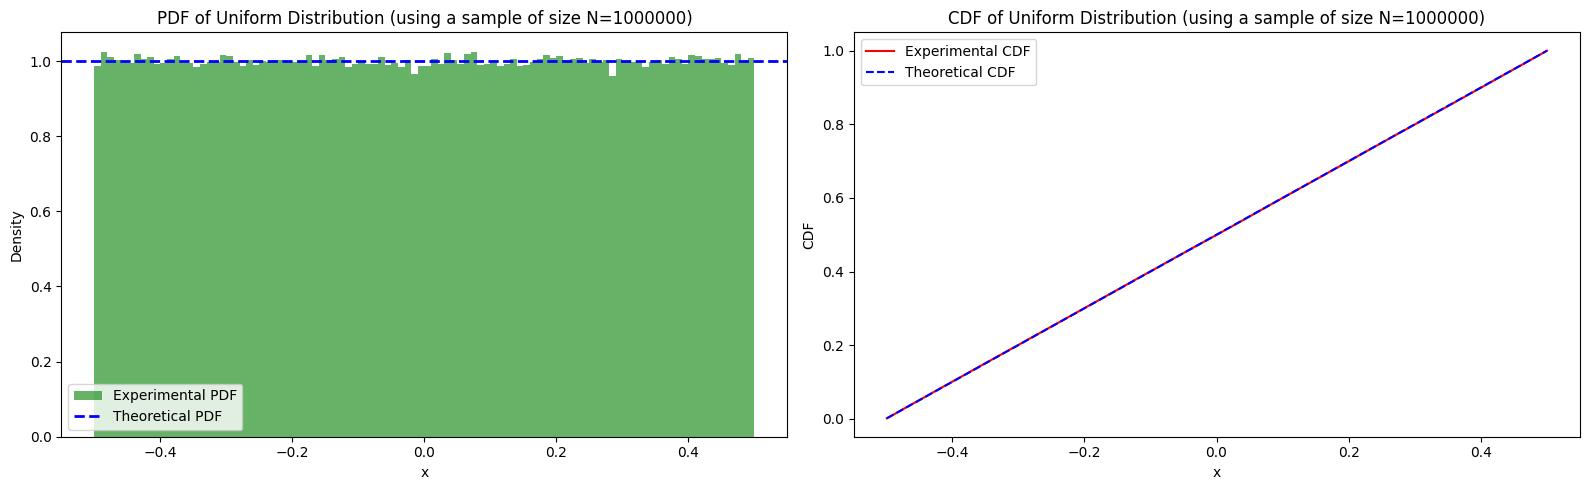

In [61]:
# We plot experimental PDF and theoretical PDF + experimental and theoretical CDF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# PDF plot
ax1.hist(data[0], bins=100, density=True, alpha=0.6, color='g', label='Experimental PDF')
ax1.axhline(y=1/(b-a), color='blue', linestyle='dashed', linewidth=2, label='Theoretical PDF')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title('PDF of Uniform Distribution (using a sample of size N={})'.format(N))
ax1.legend()

# CDF plot
count, bins_count = np.histogram(data[0], bins=1000) 
pdf = count / sum(count)
cdf = np.cumsum(pdf)

ax2.plot(bins_count[1:], cdf, label='Experimental CDF', color='red')
ax2.plot(bins_count[1:], (bins_count[1:] - a) / (b - a), label='Theoretical CDF', color='blue', linestyle='dashed')
ax2.set_xlabel('x')
ax2.set_ylabel('CDF')
ax2.set_title('CDF of Uniform Distribution (using a sample of size N={})'.format(N))
ax2.legend()

plt.tight_layout()
plt.show()

##### **Problem 0.2: Generating Random Data following a Normal Distribution**

For a random variable $X \sim \mathcal{N}(\mu, \sigma^2)$, the theoretical properties are:

**Expected Value (Mean):**
$$E[X] = \mu$$

**Variance:**
$$\text{Var}(X) = \sigma^2$$

**Probability Density Function (PDF):**
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**Cumulative Distribution Function (CDF):**
$$F(x) = \frac{1}{2}\left[1 + \text{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]$$

where $\text{erf}$ is the error function.

In [62]:
# generator of normal random samples

# mu mean
# sigma standard deviation
# N number of samples
# nrep number of repetitions

def normal_random_sample(mu, sigma, N, nrep):
    return np.random.normal(mu, sigma, (nrep, N))

In [63]:
N = 100000  # size of the sample
nrep = 1    # number of repetitions
mu = 0      # mean
sigma = 2   # standard deviation

data = normal_random_sample(mu, sigma, N, nrep)

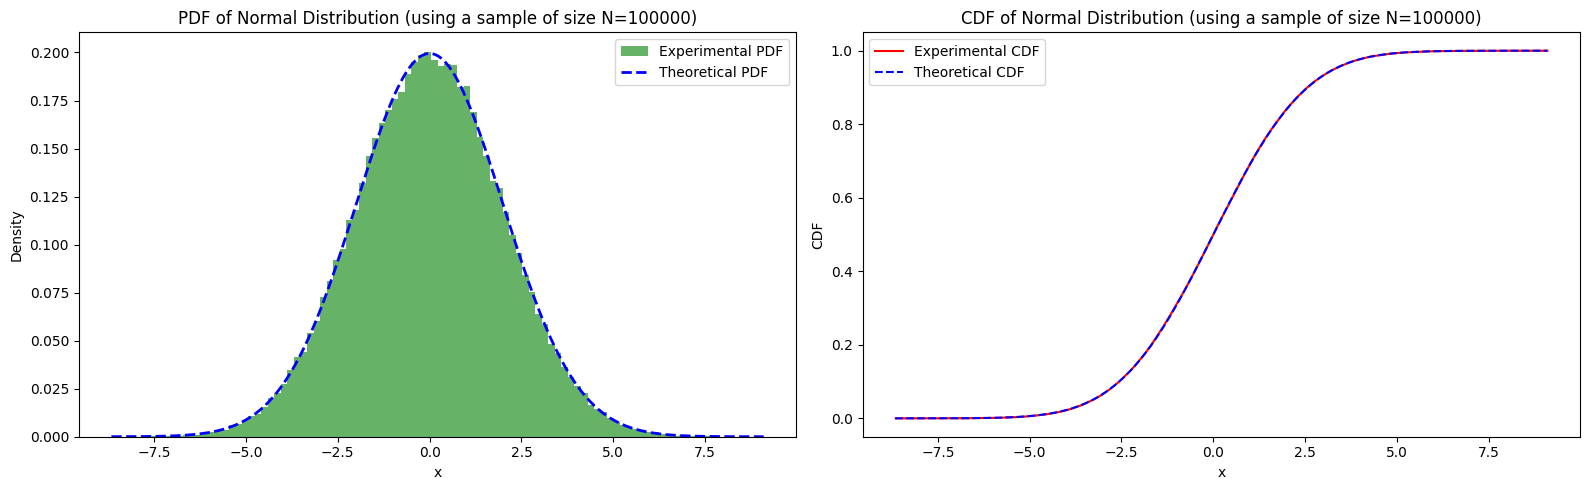

In [64]:
# We plot experimental PDF and theoretical PDF + experimental and theoretical CDF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# PDF plot
ax1.hist(data[0], bins=100, density=True, alpha=0.6, color='g', label='Experimental PDF')

# Theoretical PDF
x_range = np.linspace(data[0].min(), data[0].max(), 1000)
theoretical_pdf = norm.pdf(x_range, mu, sigma)
ax1.plot(x_range, theoretical_pdf, color='blue', linestyle='dashed', linewidth=2, label='Theoretical PDF')

ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title('PDF of Normal Distribution (using a sample of size N={})'.format(N))
ax1.legend()

# CDF plot
count, bins_count = np.histogram(data[0], bins=1000)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

ax2.plot(bins_count[1:], cdf, label='Experimental CDF', color='red')

# Theoretical CDF
theoretical_cdf = norm.cdf(x_range, mu, sigma)
ax2.plot(x_range, theoretical_cdf, label='Theoretical CDF', color='blue', linestyle='dashed')

ax2.set_xlabel('x')
ax2.set_ylabel('CDF')
ax2.set_title('CDF of Normal Distribution (using a sample of size N={})'.format(N))
ax2.legend()

plt.tight_layout()
plt.show()

In [65]:
nrep = 1

N1 = 100000  # size of the sample
mu1 = 5      # mean
sigma1 = 1   # standard deviation

N2 = 100000  # size of the sample
mu2 = -3     # mean
sigma2 = 5   # standard deviation

data1 = normal_random_sample(mu1, sigma1, N1, nrep)
data2 = normal_random_sample(mu2, sigma2, N2, nrep)

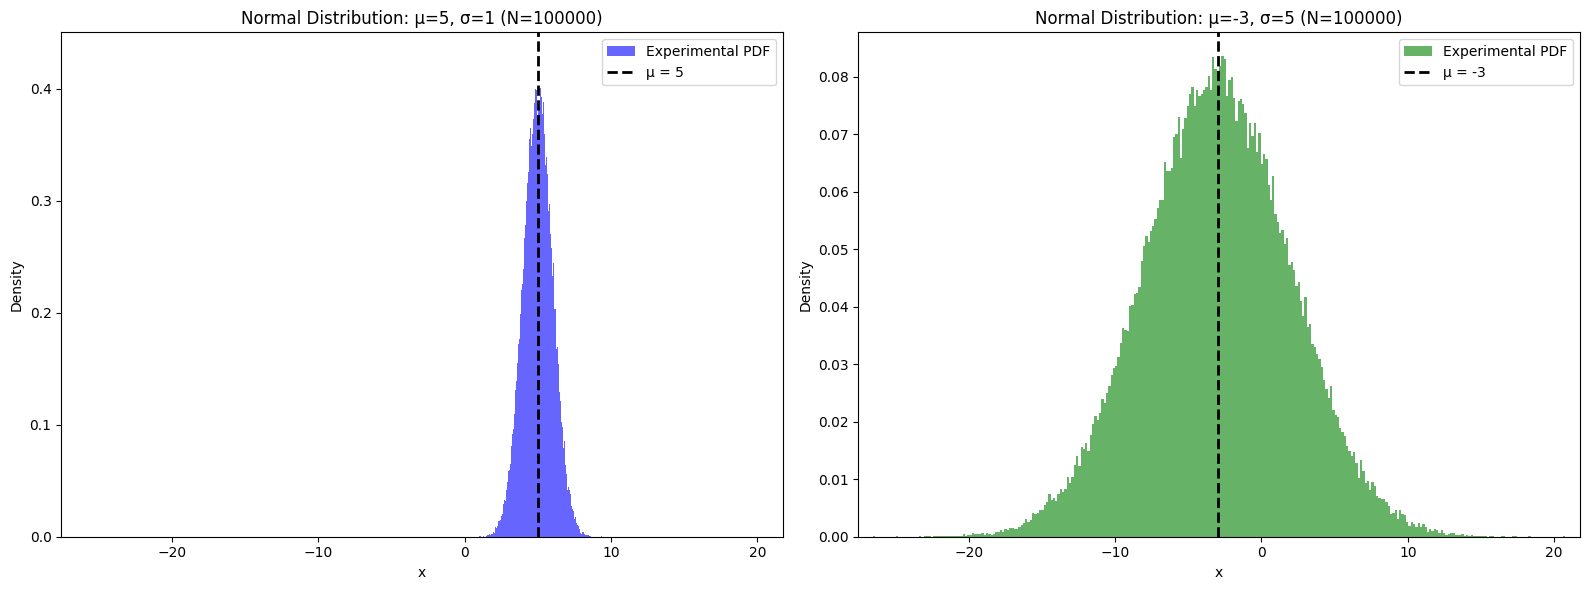

In [66]:
# Plot PDFs of both datasets side by side with the same x-axis scale
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Determine common x-axis range to spot differences
x_min = min(data1[0].min(), data2[0].min()) - 1
x_max = max(data1[0].max(), data2[0].max()) + 1
x_range = np.linspace(x_min, x_max, 1000)

# Plot data1
ax1.hist(data1[0], bins=300, density=True, alpha=0.6, color='blue', label='Experimental PDF')
ax1.axvline(x=mu1, color='black', linestyle='--', linewidth=2, label=f'μ = {mu1}')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title(f'Normal Distribution: μ={mu1}, σ={sigma1} (N={N1})')
ax1.set_xlim(x_min, x_max)
ax1.legend()
# ax1.grid(True, alpha=0.3)

# Plot data2
ax2.hist(data2[0], bins=300, density=True, alpha=0.6, color='green', label='Experimental PDF')
ax2.axvline(x=mu2, color='black', linestyle='--', linewidth=2, label=f'μ = {mu2}')
ax2.set_xlabel('x')
ax2.set_ylabel('Density')
ax2.set_title(f'Normal Distribution: μ={mu2}, σ={sigma2} (N={N2})')
ax2.set_xlim(x_min, x_max)
ax2.legend()
# ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### **Problem 0.3: Generating Random Data following a Beta Distribution**

For a random variable $X \sim \text{Beta}(\alpha, \beta)$, the theoretical properties are:

**Expected Value (Mean):**

$$E[X] = \frac{\alpha}{\alpha + \beta}$$

**Variance:**

$$\text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$$

**Probability Density Function (PDF):**

$$f(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$

where $B(\alpha, \beta)$ is the Beta function:

$$B(\alpha, \beta) = \int_0^1 t^{\alpha-1}(1-t)^{\beta-1} dt$$

**Cumulative Distribution Function (CDF):**

$$F(x; \alpha, \beta) = \int_0^x f(t; \alpha, \beta) dt$$

where $0 < x < 1$, $\alpha > 0$, $\beta > 0$.

**Relationship between $\alpha$, $\beta$ and CDF, PDF shape**: [click here](https://en.wikipedia.org/wiki/Beta_distribution)

In [67]:
# generator of beta random samples

# alpha 
# beta 
# N number of samples
# nrep number of repetitions

def beta_random_sample(alpha, beta, N, nrep):
    return np.random.beta(alpha, beta, (nrep, N))

In [68]:
N = 100000  # size of the sample
nrep = 1    # number of repetitions
alpha = 0.5      # mean
beta = 0.5   # standard deviation

data = beta_random_sample(alpha, beta, N, nrep)

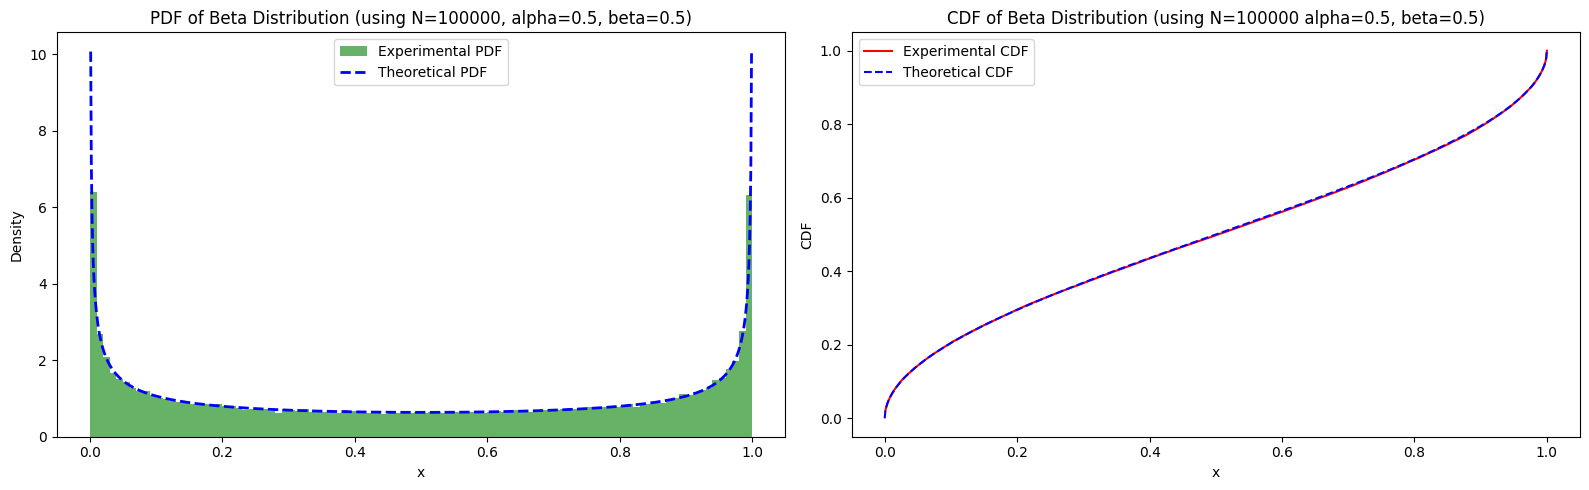

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# PDF plot
ax1.hist(data[0], bins=100, density=True, alpha=0.6, color='g', label='Experimental PDF')
x_range = np.linspace(0, 1, 1000)
theoretical_pdf = beta_dis.pdf(x_range, alpha, beta)
ax1.plot(x_range, theoretical_pdf, color='blue', linestyle='dashed', linewidth=2, label='Theoretical PDF')
ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title('PDF of Beta Distribution (using N={}, alpha={}, beta={})'.format(N, alpha, beta))
ax1.legend()

# CDF plot
count, bins_count = np.histogram(data[0], bins=1000, range=(0,1))
pdf = count / sum(count)
cdf = np.cumsum(pdf)

ax2.plot(bins_count[1:], cdf, label='Experimental CDF', color='red')
theoretical_cdf = beta_dis.cdf(x_range, alpha, beta)
ax2.plot(x_range, theoretical_cdf, label='Theoretical CDF', color='blue', linestyle='dashed')
ax2.set_xlabel('x')
ax2.set_ylabel('CDF')
ax2.set_title('CDF of Beta Distribution (using N={} alpha={}, beta={})'.format(N, alpha, beta))
ax2.legend()

plt.tight_layout()
plt.show()

In [70]:
nrep = 1 
N = 100000

alpha1 = 0.5      
beta1 = 0.5  

alpha2 = 5     
beta2 = 1 

alpha3 = 1
beta3 = 3

alpha4 = 2
beta4 = 2

alpha5 = 2
beta5 = 5

data1 = beta_random_sample(alpha1, beta1, N, nrep)
data2 = beta_random_sample(alpha2, beta2, N, nrep)
data3 = beta_random_sample(alpha3, beta3, N, nrep)
data4 = beta_random_sample(alpha4, beta4, N, nrep)
data5 = beta_random_sample(alpha5, beta5, N, nrep)

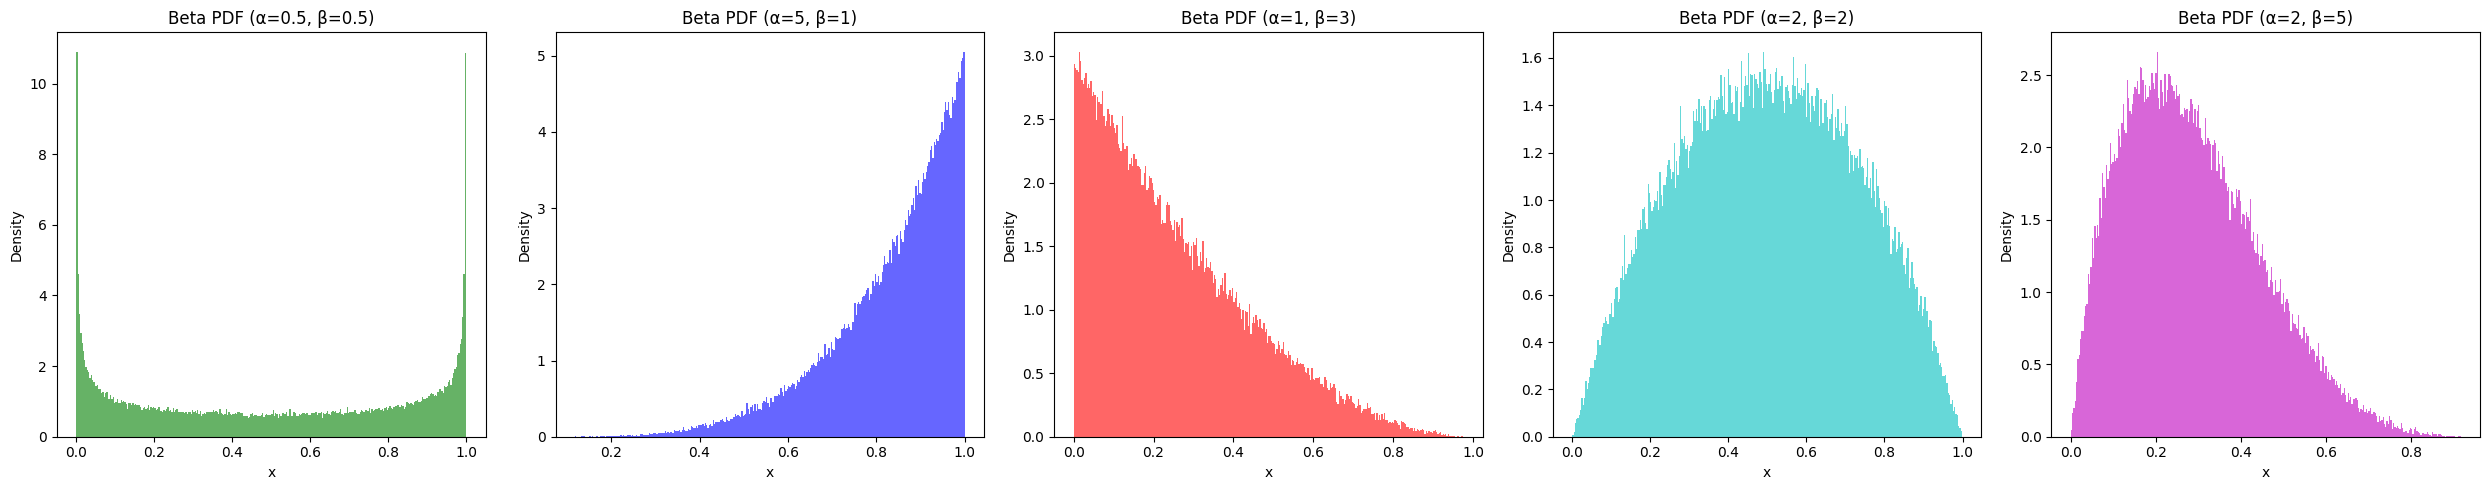

In [71]:
# Plot a grid of 5 PDFs for the beta data sets (experimental only)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
datasets = [data1, data2, data3, data4, data5]
params = [
    (alpha1, beta1),
    (alpha2, beta2),
    (alpha3, beta3),
    (alpha4, beta4),
    (alpha5, beta5)
]
colors = ['g', 'b', 'r', 'c', 'm']

for i, (data, (alpha, beta)) in enumerate(zip(datasets, params)):
    axes[i].hist(data[0], bins=300, density=True, alpha=0.6, color=colors[i], label='Experimental PDF')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Beta PDF (α={alpha}, β={beta})')
    # axes[i].legend()

plt.tight_layout()
plt.show()

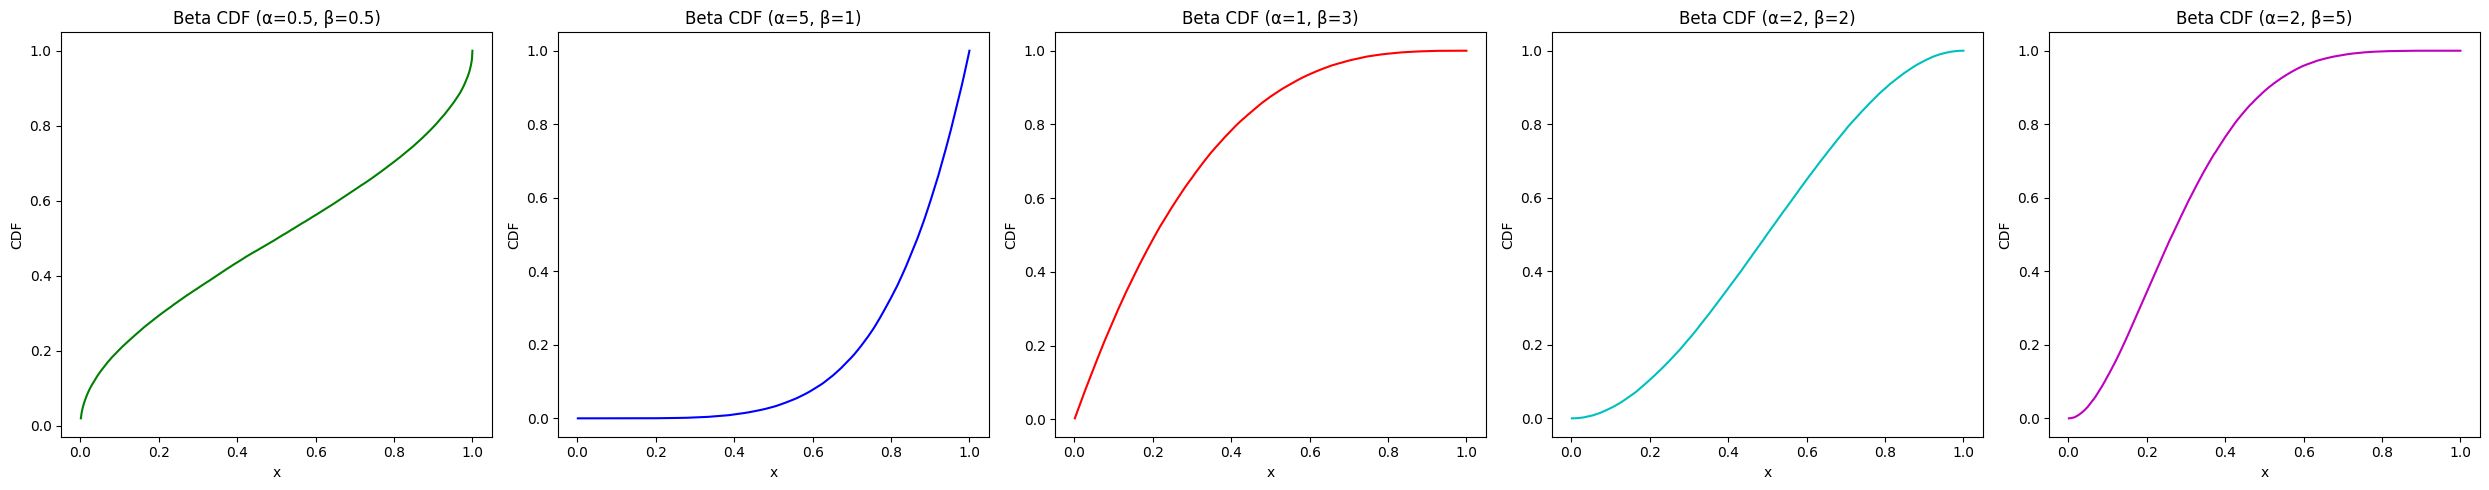

In [72]:
# Plot a grid of 5 CDFs for the beta data sets (experimental only)
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
datasets = [data1, data2, data3, data4, data5]
params = [
    (alpha1, beta1),
    (alpha2, beta2),
    (alpha3, beta3),
    (alpha4, beta4),
    (alpha5, beta5)
]
colors = ['g', 'b', 'r', 'c', 'm']

for i, (data, (alpha, beta)) in enumerate(zip(datasets, params)):
    count, bins_count = np.histogram(data[0], bins=1000, range=(0,1))
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    axes[i].plot(bins_count[1:], cdf, color=colors[i], label='Experimental CDF')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('CDF')
    axes[i].set_title(f'Beta CDF (α={alpha}, β={beta})')
    # axes[i].legend()

plt.tight_layout()
plt.show()

##### **Problem 0.4: Generating Final Datasets**

In [73]:
# size parameters
nreps = 1000 # number of runs/repetitions
N = 100000 # size of each run

In [74]:
# Uniform dataset
def uniform_theoretical_mean (a,b):
    return (a+b)/2

def uniform_theoretical_variance (a,b):
    return ((b-a)**2)/12

# distibution parameters
a_unif_narrow = -1/2
b_unif_narrow = 1/2

a_unif_broad = -15
b_unif_broad = 15

# Note that this dataset is bounded between a_unif and b_unif
uniform_narrow_dataset = uniform_random_sample(a_unif_narrow, b_unif_narrow, N, nreps)
uniform_broad_dataset = uniform_random_sample(a_unif_broad, b_unif_broad, N, nreps)

In [75]:
# Normal datasets.
def normal_theoretical_mean (mu,sigma):
    return mu

def normal_theoretical_variance (mu, sigma):
    return sigma**2

# distribution parameters
mu_narrow = -1
sigma_narrow = 0.3

mu_broad = 3
sigma_broad = 15

# Note that these datasets are UNBOUNDED
normal_narrow_dataset = normal_random_sample(mu_narrow, sigma_narrow, N, nreps)
normal_broad_dataset = normal_random_sample(mu_broad, sigma_broad, N, nreps)

In [76]:
# beta datasets
def beta_theoretical_mean (alpha, beta):
    return alpha / (alpha + beta)
def beta_theoretical_variance (alpha, beta):
    return (alpha * beta) / ((alpha + beta)**2 * (alpha + beta + 1))

# distribution parameters
alpha1 = 0.5      
beta1 = 0.5

alpha2 = 1
beta2 = 3

alpha3 = 2
beta3 = 2

# note that these datasets are bounded between 0 and 1
beta_dataset1 = beta_random_sample(alpha1, beta1, N, nreps)
beta_dataset2 = beta_random_sample(alpha2, beta2, N, nreps)
beta_dataset3 = beta_random_sample(alpha3, beta3, N, nreps)

Note that our datasets are 2D random datasets (`nreps × N`). This is beneficial because, on one hand, we can simulate `nreps` independent experiments each of size `N`; on the other hand, we can flatten the array to obtain a 1D dataset of size `nreps * N` for analyses that require a single sample vector.

#### **Problem 1: Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically estimate the variance).**

In the following sections, we calculate the Hoeffding and Chebyshev inequality bounds for our datasets. These bounds provide confidence intervals for the sample mean estimates.

In [77]:
high_confidence_score = 0.95 # 95% confidence
delta_high = 1 - high_confidence_score

low_confidence_score = 0.2 # 20% confidence
delta_low = 1 - low_confidence_score

##### **Problem 1.1: Hoeffding Bound**

**Hoeffding Inequality** -  Let $X_1, ..., X_N$ be i.i.d. random variables, bounded by the intervals $a_i \leq X_i \leq b_i$. Let the empirical mean be defined according to $\overline{X} = \frac{1}{N} \sum_{i=1}^N X_i$. It holds that: $$ P(|\overline{X} - \mathbb{E}[\overline{X}]| \geq \epsilon) \leq 2e^{-\frac{2N^2\epsilon^2}{\sum_{i=1}^N(a_i - b_i)^2}} $$

The above expression can be used to bound an estimation error. We can also use it to know how big our random sample must be in order to guarantee an estimation with a certain confidence score. 

We make additional constraints given the exercise premise. Let $X_1, ..., X_N$ be i.i.d. random variables and equally distributed, all bounded by the interval $a \leq X_i \leq b$. In this scenario, it holds that: $$ P(|\overline{X} - \mathbb{E}[\overline{X}]| \geq \epsilon) \leq 2e^{-\frac{2N\epsilon^2}{(a - b)^2}} $$

Let us use $1 - \Delta$ to represent the confidence. Therefore we can say that the bound holds with probability at least $1-\Delta$:
$$2\exp\left(-\dfrac{2N\epsilon^2}{(b-a)^2}\right) = \Delta$$

Taking logs (natural logs) and rearranging for $\epsilon$ we find that:
$$\epsilon_{\text{Hoeff}} = (b-a)\sqrt{\dfrac{\log\left(2/\Delta\right)}{2N}}$$

This means that with probability $1-\Delta$ or better, the following bound holds:
$$|\overline{X} - \mathbb{E}[\overline{X}]| \leq \epsilon_{\text{Hoeff}}$$

In [78]:
def hoeffding_bound(a, b, N, delta):
    hoeffding_bound = (b - a) * np.sqrt(np.log(2 / delta) / (2 * N))
    return hoeffding_bound

##### **Problem 1.1.1: Hoeffding Bound: Uniform Distribution**

Since a random variable that is uniformly distributed between $a$ and $b$ is bounded within the interval $[a, b]$, the Hoeffding's inequality applies directly.

In [79]:
# hoeffding bound for uniform datasets at high confidence
hoeffding_uniform_narrow_high = hoeffding_bound(a_unif_narrow, b_unif_narrow, N, delta_high)
hoeffding_uniform_broad_high = hoeffding_bound(a_unif_broad, b_unif_broad, N, delta_high)

print(f"Hoeffding bound for narrow uniform dataset with N={N} at {high_confidence_score*100}% confidence: {hoeffding_uniform_narrow_high:.6f}")
print(f"Hoeffding bound for broad uniform dataset with N={N} at {high_confidence_score*100}% confidence: {hoeffding_uniform_broad_high:.6f}")

Hoeffding bound for narrow uniform dataset with N=100000 at 95.0% confidence: 0.004295
Hoeffding bound for broad uniform dataset with N=100000 at 95.0% confidence: 0.128841


In [80]:
# hoeffding bound for uniform dataset at low confidence
hoeffding_uniform_narrow_low = hoeffding_bound(a_unif_narrow, b_unif_narrow, N, delta_low)
hoeffding_uniform_broad_low = hoeffding_bound(a_unif_broad, b_unif_broad, N, delta_low)

print(f"Hoeffding bound for narrow uniform dataset with N={N} at {low_confidence_score*100}% confidence: {hoeffding_uniform_narrow_low:.6f}")
print(f"Hoeffding bound for broad uniform dataset with N={N} at {low_confidence_score*100}% confidence: {hoeffding_uniform_broad_low:.6f}")

Hoeffding bound for narrow uniform dataset with N=100000 at 20.0% confidence: 0.002140
Hoeffding bound for broad uniform dataset with N=100000 at 20.0% confidence: 0.064213


##### **Problem 1.1.2: Hoeffding Bound: Normal Distribution**

Since a normally distributed random variable has domain $(-\infty, \infty)$, it is unbounded, meaning Hoeffding's inequality does not directly apply. However, we can clip/truncate the data to a bounded interval $[a, b]$ by removing values in low-probability tails (e.g., beyond $\mu \pm k\sigma$), allowing us to approximate the Hoeffding bound on the truncated dataset.

In [81]:
# hoeffding bounds for normal datasets

# hoeffding bound can not be aplied to current normal datasets. The RV is not unbounded and therefore it does not apply for Hoeffding.
print("Hoeffding bound can not be aplied to current normal datasets. The RV is not unbounded and therefore it does not apply for Hoeffding.")

Hoeffding bound can not be aplied to current normal datasets. The RV is not unbounded and therefore it does not apply for Hoeffding.


In [82]:
# we put our k value to 3.5 since normal distribution satisfies the 68-95-99.7 rule, at 3 sigma the data is almost all included
def clip_normal(dataset, mu, sigma, k=3.5):
    a = mu - k * sigma
    b = mu + k * sigma
    clipped = np.clip(dataset, a, b)
    return clipped, a, b

clipped_normal_narrow_dataset, a_narrow, b_narrow = clip_normal (normal_narrow_dataset, mu_narrow, sigma_narrow) 
clipped_normal_broad_dataset, a_broad, b_broad = clip_normal (normal_broad_dataset, mu_broad, sigma_broad)

In [83]:
# hoeffding bound for clipped normal datasets at high confidence

hoeffding_clipped_normal_narrow_high = hoeffding_bound(a_narrow, b_narrow, N, delta_high)
hoeffding_clipped_normal_broad_high = hoeffding_bound(a_broad, b_broad, N, delta_high)

print(f'hoeffding_bound for clipped normal dataset with N={N} at {high_confidence_score*100}% confidence: {hoeffding_clipped_normal_narrow_high:.6f}')
print(f'hoeffding_bound for clipped normal dataset with N={N} at {high_confidence_score*100}% confidence: {hoeffding_clipped_normal_broad_high:.6f}')

hoeffding_bound for clipped normal dataset with N=100000 at 95.0% confidence: 0.009019
hoeffding_bound for clipped normal dataset with N=100000 at 95.0% confidence: 0.450943


In [84]:
# hoeffding bound for clipped normal datasets at low confidence

hoeffding_clipped_normal_narrow_low = hoeffding_bound(a_narrow, b_narrow, N, delta_low)
hoeffding_clipped_normal_broad_low = hoeffding_bound(a_broad, b_broad, N, delta_low)

print(f'hoeffding_bound for clipped normal dataset with N={N} at {low_confidence_score*100}% confidence: {hoeffding_clipped_normal_narrow_low:.6f}')
print(f'hoeffding_bound for clipped normal dataset with N={N} at {low_confidence_score*100}% confidence: {hoeffding_clipped_normal_broad_low:.6f}')

hoeffding_bound for clipped normal dataset with N=100000 at 20.0% confidence: 0.004495
hoeffding_bound for clipped normal dataset with N=100000 at 20.0% confidence: 0.224745


The main issue with truncating normally distributed datasets is that we are artificially imposing a bounding interval on an inherently unbounded random variable. While choosing a broader interval (larger $k$) improves dataset quality by reducing the probability that values fall outside our bounds, it simultaneously makes the Hoeffding bound more conservative and less informative. This trade-off arises because Hoeffding's inequality depends directly on the interval width $(b-a)$ so a larger interval yields a looser bound.

##### **Problem 1.1.3: Hoeffding Bound: Beta Distribution**

Since a random variable following a Beta distribution is always bounded within the interval $[0, 1]$, Hoeffding's inequality applies directly without the need for any truncation or modification. Since all of our beta distributed datasets are bounded by $[0, 1]$ (and since confidence and size of the run N is shared across datasets), the Hoeffding Bound is the same for all 3 datasets.

In [85]:
# hoeffding bound for beta datasets at high confidence
hoeffding_beta1_high = hoeffding_bound(0, 1, N, delta_high)
hoeffding_beta2_high = hoeffding_bound(0, 1, N, delta_high)
hoeffding_beta3_high = hoeffding_bound(0, 1, N, delta_high)

print(f"Hoeffding bound for beta dataset 1 with N={N} at {high_confidence_score*100}% confidence: {hoeffding_beta1_high:.6f}")
print(f"Hoeffding bound for beta dataset 2 with N={N} at {high_confidence_score*100}% confidence: {hoeffding_beta2_high:.6f}")
print(f"Hoeffding bound for beta dataset 3 with N={N} at {high_confidence_score*100}% confidence: {hoeffding_beta3_high:.6f}")

Hoeffding bound for beta dataset 1 with N=100000 at 95.0% confidence: 0.004295
Hoeffding bound for beta dataset 2 with N=100000 at 95.0% confidence: 0.004295
Hoeffding bound for beta dataset 3 with N=100000 at 95.0% confidence: 0.004295


In [86]:
# hoeffding bound for clipped normal datasets at low confidence
hoeffding_beta1_low = hoeffding_bound(0, 1, N, delta_low)
hoeffding_beta2_low = hoeffding_bound(0, 1, N, delta_low)
hoeffding_beta3_low = hoeffding_bound(0, 1, N, delta_low)

print(f"Hoeffding bound for beta dataset 1 with N={N} at {low_confidence_score*100}% confidence: {hoeffding_beta1_low:.6f}")
print(f"Hoeffding bound for beta dataset 2 with N={N} at {low_confidence_score*100}% confidence: {hoeffding_beta2_low:.6f}")
print(f"Hoeffding bound for beta dataset 3 with N={N} at {low_confidence_score*100}% confidence: {hoeffding_beta3_low:.6f}")

Hoeffding bound for beta dataset 1 with N=100000 at 20.0% confidence: 0.002140
Hoeffding bound for beta dataset 2 with N=100000 at 20.0% confidence: 0.002140
Hoeffding bound for beta dataset 3 with N=100000 at 20.0% confidence: 0.002140


##### **Problem 1.2: Chebyshev Bound**

**Chebyshev Inequality**: if $X$ is a random variable with finite mean and variance $\sigma^2$, then $$ P(|X-\mathbb{E}[X]|\geq \epsilon)\leq \frac{\sigma^2}{\epsilon^2} $$ for all $\epsilon > 0$.

Also, letting $\epsilon = k\sigma$: $$ P(|X-\mathbb{E}[X]|\geq k\sigma)\leq \frac{1}{k^2} $$
        

For the sample mean $\overline{X}=\frac{1}{N}\sum_{k=1}^NX_k$, Chebyshev inequality tells us: $$ P(|\overline{X} -\mu| \geq \epsilon) \leq \frac{\hat{\sigma}^2}{\epsilon^2} = \frac{\sigma^2}{N\epsilon^2} $$


So analogously to the Hoeffding case, we can now assume a confidence score $1-\Delta$ such that:
$$\Delta = \dfrac{\sigma^2}{N\epsilon^2} \rightarrow \epsilon_{\text{Chebyshev}} = \dfrac{\sigma}{\sqrt{N\Delta}}$$

Which means that with probability $1-\Delta$ or better:
$$|X-\mathbb{E}[X]|\leq \epsilon_{\text{Chebyshev}}$$

In [87]:
def chebyshev_bound(sigma, N, delta):
    chebyshev_bound = sigma / np.sqrt(N * delta)
    return chebyshev_bound

##### **Problem 1.2.1: Chebyshev Bound: Uniform Distribution**

Since the uniform distribution has variance $\frac{(b-a)^2}{12}$, the standard deviation is $\sigma = \frac{b-a}{2\sqrt{3}}$.

In [88]:
# theoretical variance for uniform
uniform_variance_narrow = uniform_theoretical_variance(a_unif_narrow, b_unif_narrow)
uniform_desvest_narrow = np.sqrt(uniform_variance_narrow)

uniform_variance_broad = uniform_theoretical_variance(a_unif_broad, b_unif_broad)
uniform_desvest_broad = np.sqrt(uniform_variance_broad)

In [89]:
# chebyshev bound for uniform datasets at high confidence
chebyshev_uniform_narrow_high = chebyshev_bound(uniform_desvest_narrow, N, delta_high)
chebyshev_uniform_broad_high = chebyshev_bound(uniform_desvest_broad, N, delta_high)

print(f"Chebyshev bound for narrow uniform dataset with N={N} at {high_confidence_score*100}% confidence: {chebyshev_uniform_narrow_high:.6f}")
print(f"Chebyshev bound for broad uniform dataset with N={N} at {high_confidence_score*100}% confidence: {chebyshev_uniform_broad_high:.6f}")

Chebyshev bound for narrow uniform dataset with N=100000 at 95.0% confidence: 0.004082
Chebyshev bound for broad uniform dataset with N=100000 at 95.0% confidence: 0.122474


In [90]:
# chebushev bound for uniform datasets at low confidence
chebyshev_uniform_narrow_low = chebyshev_bound(uniform_desvest_narrow, N, delta_low)
chebyshev_uniform_broad_low = chebyshev_bound(uniform_desvest_broad, N, delta_low)

print(f"Chebyshev bound for narrow uniform dataset with N={N} at {low_confidence_score*100}% confidence: {chebyshev_uniform_narrow_low:.6f}")
print(f"Chebyshev bound for broad uniform dataset with N={N} at {low_confidence_score*100}% confidence: {chebyshev_uniform_broad_low:.6f}")

Chebyshev bound for narrow uniform dataset with N=100000 at 20.0% confidence: 0.001021
Chebyshev bound for broad uniform dataset with N=100000 at 20.0% confidence: 0.030619


##### **Problem 1.2.3: Chebyshev Bound: Normal Distribution**

For a normally distributed random variable $X \sim \mathcal{N}(\mu, \sigma^2)$, the variance is $\sigma^2$ and therefore the standard deviation is simply the parameter $\sigma$.

In [91]:
# theoretical variance for normal datasets
normal_variance_narrow = normal_theoretical_variance(mu_narrow, sigma_narrow)
normal_desvest_narrow = np.sqrt(normal_variance_narrow)

normal_variance_broad = normal_theoretical_variance(mu_broad, sigma_broad)
normal_desvest_broad = np.sqrt(normal_variance_broad)

In [92]:
# chebyshev bound for normal datasets for high confidence
chebyshev_normal_narrow_high = chebyshev_bound(normal_desvest_narrow, N, delta_high)
print(f"Chebyshev bound for normal narrow dataset with N={N} at {high_confidence_score*100}% confidence: {chebyshev_normal_narrow_high:.6f}")

chebyshev_normal_broad_high = chebyshev_bound(normal_desvest_broad, N, delta_high)
print(f"Chebyshev bound for normal broad dataset with N={N} at {high_confidence_score*100}% confidence: {chebyshev_normal_broad_high:.6f}")

Chebyshev bound for normal narrow dataset with N=100000 at 95.0% confidence: 0.004243
Chebyshev bound for normal broad dataset with N=100000 at 95.0% confidence: 0.212132


In [93]:
# chebyshev bound for normal datasets for low confidence
chebyshev_normal_narrow_low = chebyshev_bound(normal_desvest_narrow, N, delta_low)
print(f"Chebyshev bound for normal narrow dataset with N={N} at {low_confidence_score*100}% confidence: {chebyshev_normal_narrow_low:.6f}")

chebyshev_normal_broad_low = chebyshev_bound(normal_desvest_broad, N, delta_low)
print(f"Chebyshev bound for normal broad dataset with N={N} at {low_confidence_score*100}% confidence: {chebyshev_normal_broad_low:.6f}")

Chebyshev bound for normal narrow dataset with N=100000 at 20.0% confidence: 0.001061
Chebyshev bound for normal broad dataset with N=100000 at 20.0% confidence: 0.053033


##### **Problem 1.2.3: Chebyshev Bound: Beta Distribution**

For a random variable $X \sim \text{Beta}(\alpha, \beta)$, the variance is given by:

$$\text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$$

and therefore the standard deviation is:

$$\sigma = \sqrt{\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}}$$

In [94]:
# theoretical variance for beta datasets
beta1_variance = beta_theoretical_variance(alpha1, beta1)
beta1_desvest = np.sqrt(beta1_variance)

beta2_variance = beta_theoretical_variance(alpha2, beta2)
beta2_desvest = np.sqrt(beta2_variance)

beta3_variance = beta_theoretical_variance(alpha3, beta3)
beta3_desvest = np.sqrt(beta3_variance)

In [95]:
# chebyshev bound for beta datasets (note that variance depends on alpha and beta parameters) for high confidence
chebyshev_beta1_high = chebyshev_bound(beta1_desvest, N, delta_high)
print(f"Chebyshev bound for beta dataset 1 with N={N} at {high_confidence_score*100}% confidence: {chebyshev_beta1_high:.6f}")

chebyshev_beta2_high = chebyshev_bound(beta2_desvest, N, delta_high)
print(f"Chebyshev bound for beta dataset 2 with N={N} at {high_confidence_score*100}% confidence: {chebyshev_beta2_high:.6f}")

chebyshev_beta3_high = chebyshev_bound(beta3_desvest, N, delta_high)
print(f"Chebyshev bound for beta dataset 3 with N={N} at {high_confidence_score*100}% confidence: {chebyshev_beta3_high:.6f}")

Chebyshev bound for beta dataset 1 with N=100000 at 95.0% confidence: 0.005000
Chebyshev bound for beta dataset 2 with N=100000 at 95.0% confidence: 0.002739
Chebyshev bound for beta dataset 3 with N=100000 at 95.0% confidence: 0.003162


In [96]:
# chebyshev bound for beta datasets (note that variance depends on alpha and beta parameters) for low confidence
chebyshev_beta1_low = chebyshev_bound(beta1_desvest, N, delta_low)
print(f"Chebyshev bound for beta dataset 1 with N={N} at {low_confidence_score*100}% confidence: {chebyshev_beta1_low:.6f}")

chebyshev_beta2_low = chebyshev_bound(beta2_desvest, N, delta_low)
print(f"Chebyshev bound for beta dataset 2 with N={N} at {low_confidence_score*100}% confidence: {chebyshev_beta2_low:.6f}")

chebyshev_beta3_low = chebyshev_bound(beta3_desvest, N, delta_low)
print(f"Chebyshev bound for beta dataset 3 with N={N} at {low_confidence_score*100}% confidence: {chebyshev_beta3_low:.6f}")

Chebyshev bound for beta dataset 1 with N=100000 at 20.0% confidence: 0.001250
Chebyshev bound for beta dataset 2 with N=100000 at 20.0% confidence: 0.000685
Chebyshev bound for beta dataset 3 with N=100000 at 20.0% confidence: 0.000791


##### **Problem 1.2.4: Hoeffding's vs Chebyshev's Bound**

The tables below summarize the Hoeffding and Chebyshev bounds for the low- and high-confidence scenarios. It can be seen that both bounds grow as the requested confidence increases ie larger intervals are required to guarantee stronger statements. Chebyshev is often tighter than Hoeffding because it uses variance information, but based on our analysis it looks like its width can increase sharply as confidence rises. We see that in some high-confidence cases Chebyshev can become comparable to or even exceed Hoeffding. The fact that Hoeffding is distribution-free and depends only on the support (b-a) makes it conservative for wide supports and particularly large for the clipped normal datasets since by clipping, we introduce a an artificial wide interval, producing noticeably looser bounds than Chebyshev. Beta distributions share the same Hoeffding bound here because they all live on [0, 1], therefore Hoeffding cannot exploit shape differences inside that support.

In [98]:
# high confidence results summary
print(f"\nSummary of Results (for confidence score = {high_confidence_score*100}%):")
print(f"{'Dataset':<30} {'Hoeffding Bound':<25} {'Chebyshev Bound':<25}")
print("-" * 80)
print(f"{'Uniform Narrow':<30} {hoeffding_uniform_narrow_high:<25.6f} {chebyshev_uniform_narrow_high:<25.6f}")
print(f"{'Uniform Broad':<30} {hoeffding_uniform_broad_high:<25.6f} {chebyshev_uniform_broad_high:<25.6f}")
print(f"{'Clipped Normal Narrow':<30} {hoeffding_clipped_normal_narrow_high:<25.6f} {'N/A':<25}")
print(f"{'Clipped Normal Broad':<30} {hoeffding_clipped_normal_broad_high:<25.6f} {'N/A':<25}")
print(f"{'Normal Narrow':<30} {'N/A':<25} {chebyshev_normal_narrow_high:<25.6f}")
print(f"{'Normal Broad':<30} {'N/A':<25} {chebyshev_normal_broad_high:<25.6f}")
print(f"{'Beta Dataset 1':<30} {hoeffding_beta1_high:<25.6f} {chebyshev_beta1_high:<25.6f}")
print(f"{'Beta Dataset 2':<30} {hoeffding_beta2_high:<25.6f} {chebyshev_beta2_high:<25.6f}")
print(f"{'Beta Dataset 3':<30} {hoeffding_beta3_high:<25.6f} {chebyshev_beta3_high:<25.6f}")


Summary of Results (for confidence score = 95.0%):
Dataset                        Hoeffding Bound           Chebyshev Bound          
--------------------------------------------------------------------------------
Uniform Narrow                 0.004295                  0.004082                 
Uniform Broad                  0.128841                  0.122474                 
Clipped Normal Narrow          0.009019                  N/A                      
Clipped Normal Broad           0.450943                  N/A                      
Normal Narrow                  N/A                       0.004243                 
Normal Broad                   N/A                       0.212132                 
Beta Dataset 1                 0.004295                  0.005000                 
Beta Dataset 2                 0.004295                  0.002739                 
Beta Dataset 3                 0.004295                  0.003162                 


In [97]:
# low confidence results summary
print(f"\nSummary of Results (for confidence score = {low_confidence_score*100}%):")
print(f"{'Dataset':<30} {'Hoeffding Bound':<25} {'Chebyshev Bound':<25}")
print("-" * 80)
print(f"{'Uniform Narrow':<30} {hoeffding_uniform_narrow_low:<25.6f} {chebyshev_uniform_narrow_low:<25.6f}")
print(f"{'Uniform Broad':<30} {hoeffding_uniform_broad_low:<25.6f} {chebyshev_uniform_broad_low:<25.6f}")
print(f"{'Clipped Normal Narrow':<30} {hoeffding_clipped_normal_narrow_low:<25.6f} {'N/A':<25}")
print(f"{'Clipped Normal Broad':<30} {hoeffding_clipped_normal_broad_low:<25.6f} {'N/A':<25}")
print(f"{'Normal Narrow':<30} {'N/A':<25} {chebyshev_normal_narrow_low:<25.6f}")
print(f"{'Normal Broad':<30} {'N/A':<25} {chebyshev_normal_broad_low:<25.6f}")
print(f"{'Beta Dataset 1':<30} {hoeffding_beta1_low:<25.6f} {chebyshev_beta1_low:<25.6f}")
print(f"{'Beta Dataset 2':<30} {hoeffding_beta2_low:<25.6f} {chebyshev_beta2_low:<25.6f}")
print(f"{'Beta Dataset 3':<30} {hoeffding_beta3_low:<25.6f} {chebyshev_beta3_low:<25.6f}")


Summary of Results (for confidence score = 20.0%):
Dataset                        Hoeffding Bound           Chebyshev Bound          
--------------------------------------------------------------------------------
Uniform Narrow                 0.002140                  0.001021                 
Uniform Broad                  0.064213                  0.030619                 
Clipped Normal Narrow          0.004495                  N/A                      
Clipped Normal Broad           0.224745                  N/A                      
Normal Narrow                  N/A                       0.001061                 
Normal Broad                   N/A                       0.053033                 
Beta Dataset 1                 0.002140                  0.001250                 
Beta Dataset 2                 0.002140                  0.000685                 
Beta Dataset 3                 0.002140                  0.000791                 


The following plots sweep confidence from low to high, showing how the Hoeffding and Chebyshev intervals grow with the confidence score. We also plot and compare both evolutions with the theoretical standard error $\sigma/\sqrt{N}$ since we are evaluating confidence intervals on the estimation of the mean of random samples. 

Chebyshev explots variance information and approaches the theoretical standard error as the confidence approaches zero, where no safety margin is needed. This is something that was expected by analyzing the formal expression of Chebyshev bound. We see that this bound is typically tighter than the Hoeffding bound at moderate confidence levels. However, at extreme high confidences, Chebyshev grows faster due to its due to its $1/\sqrt{\Delta}$ dependence versus Hoeffding's $\sqrt{\ln(1/\Delta)}$. A special case is the clipped normal sample, where artifically enlarging the support to accomodate tails makes Hoeffding much more conservative than Chebyshev at all confidence scores.

We expect that we can use Hoeffding when only support bounds are known for distribution-free guarantees and that we can use Chebushev when the theoretical variance is known or when reliable variance estimates exist to get generally tighter intervals except at high confidence levels, where Hoeffding might be a better option.

Please note that any conclusion extracted from this analysis only applies for the random variables distributed as one of our distributions. We can't infere any prediction for random saples distributed following other laws.

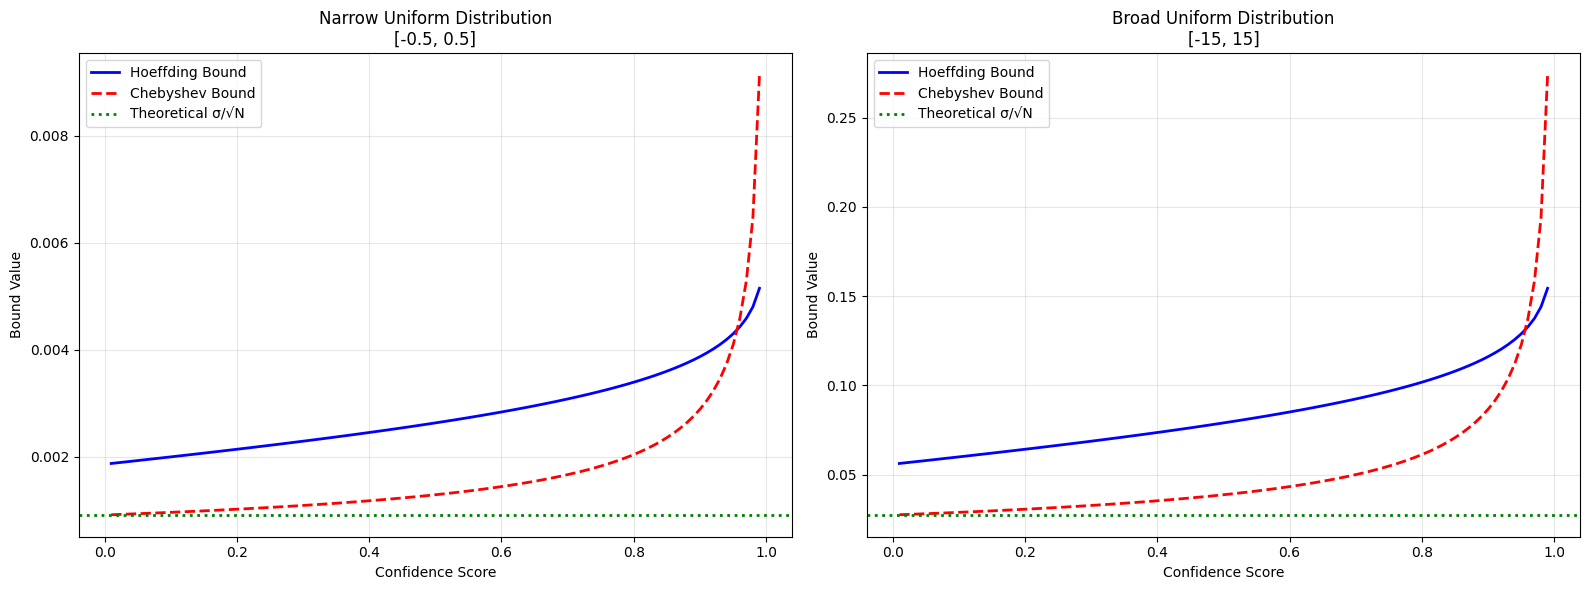

In [99]:
# Uniform Distributions Comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

confidence_scores = np.linspace(0.01, 0.99, 100)

# Narrow Uniform Distribution
theo_std_narrow = np.sqrt(uniform_theoretical_variance(a_unif_narrow, b_unif_narrow)) / np.sqrt(N)
hoeffding_bounds_narrow = [hoeffding_bound(a_unif_narrow, b_unif_narrow, N, 1 - cs) for cs in confidence_scores]
chebyshev_bounds_narrow = [chebyshev_bound(np.sqrt(uniform_theoretical_variance(a_unif_narrow, b_unif_narrow)), N, 1 - cs) for cs in confidence_scores]

ax1.plot(confidence_scores, hoeffding_bounds_narrow, 'b-', linewidth=2, label='Hoeffding Bound')
ax1.plot(confidence_scores, chebyshev_bounds_narrow, 'r--', linewidth=2, label='Chebyshev Bound')
ax1.axhline(y=theo_std_narrow, color='green', linestyle=':', linewidth=2, label='Theoretical σ/√N')
ax1.set_xlabel('Confidence Score')
ax1.set_ylabel('Bound Value')
ax1.set_title(f'Narrow Uniform Distribution\n[{a_unif_narrow}, {b_unif_narrow}]')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Broad Uniform Distribution
theo_std_broad = np.sqrt(uniform_theoretical_variance(a_unif_broad, b_unif_broad)) / np.sqrt(N)
hoeffding_bounds_broad = [hoeffding_bound(a_unif_broad, b_unif_broad, N, 1 - cs) for cs in confidence_scores]
chebyshev_bounds_broad = [chebyshev_bound(np.sqrt(uniform_theoretical_variance(a_unif_broad, b_unif_broad)), N, 1 - cs) for cs in confidence_scores]

ax2.plot(confidence_scores, hoeffding_bounds_broad, 'b-', linewidth=2, label='Hoeffding Bound')
ax2.plot(confidence_scores, chebyshev_bounds_broad, 'r--', linewidth=2, label='Chebyshev Bound')
ax2.axhline(y=theo_std_broad, color='green', linestyle=':', linewidth=2, label='Theoretical σ/√N')
ax2.set_xlabel('Confidence Score')
ax2.set_ylabel('Bound Value')
ax2.set_title(f'Broad Uniform Distribution\n[{a_unif_broad}, {b_unif_broad}]')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

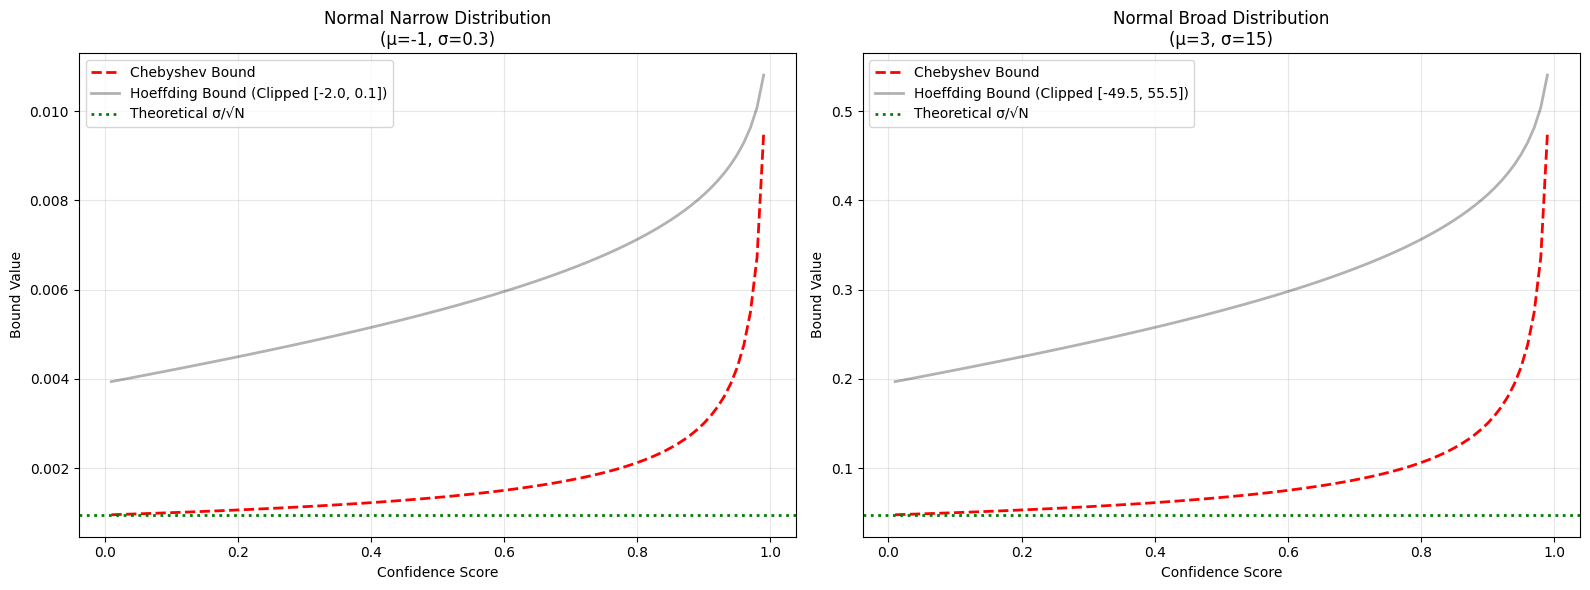

In [100]:
# Normal Distributions Comparison (Narrow vs Broad)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Normal Narrow Distribution
theo_std_normal_narrow = normal_desvest_narrow / np.sqrt(N)
chebyshev_bounds_normal_narrow = [chebyshev_bound(normal_desvest_narrow, N, 1 - cs) for cs in confidence_scores]
# Add clipped Hoeffding bounds (using the clipping bounds from earlier)
hoeffding_bounds_clipped_normal_narrow = [hoeffding_bound(a_narrow, b_narrow, N, 1 - cs) for cs in confidence_scores]

ax1.plot(confidence_scores, chebyshev_bounds_normal_narrow, 'r--', linewidth=2, label='Chebyshev Bound')
ax1.plot(confidence_scores, hoeffding_bounds_clipped_normal_narrow, 'k-', linewidth=2, alpha = 0.3, label=f'Hoeffding Bound (Clipped [{a_narrow:.1f}, {b_narrow:.1f}])')
ax1.axhline(y=theo_std_normal_narrow, color='green', linestyle=':', linewidth=2, label='Theoretical σ/√N')
ax1.set_xlabel('Confidence Score')
ax1.set_ylabel('Bound Value')
ax1.set_title(f'Normal Narrow Distribution\n(μ={mu_narrow}, σ={sigma_narrow})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Normal Broad Distribution
theo_std_normal_broad = normal_desvest_broad / np.sqrt(N)
chebyshev_bounds_normal_broad = [chebyshev_bound(normal_desvest_broad, N, 1 - cs) for cs in confidence_scores]
# Add clipped Hoeffding bounds
hoeffding_bounds_clipped_normal_broad = [hoeffding_bound(a_broad, b_broad, N, 1 - cs) for cs in confidence_scores]

ax2.plot(confidence_scores, chebyshev_bounds_normal_broad, 'r--', linewidth=2, label='Chebyshev Bound')
ax2.plot(confidence_scores, hoeffding_bounds_clipped_normal_broad, 'k-', linewidth=2, alpha = 0.3, label=f'Hoeffding Bound (Clipped [{a_broad:.1f}, {b_broad:.1f}])')
ax2.axhline(y=theo_std_normal_broad, color='green', linestyle=':', linewidth=2, label='Theoretical σ/√N')
ax2.set_xlabel('Confidence Score')
ax2.set_ylabel('Bound Value')
ax2.set_title(f'Normal Broad Distribution\n(μ={mu_broad}, σ={sigma_broad})')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

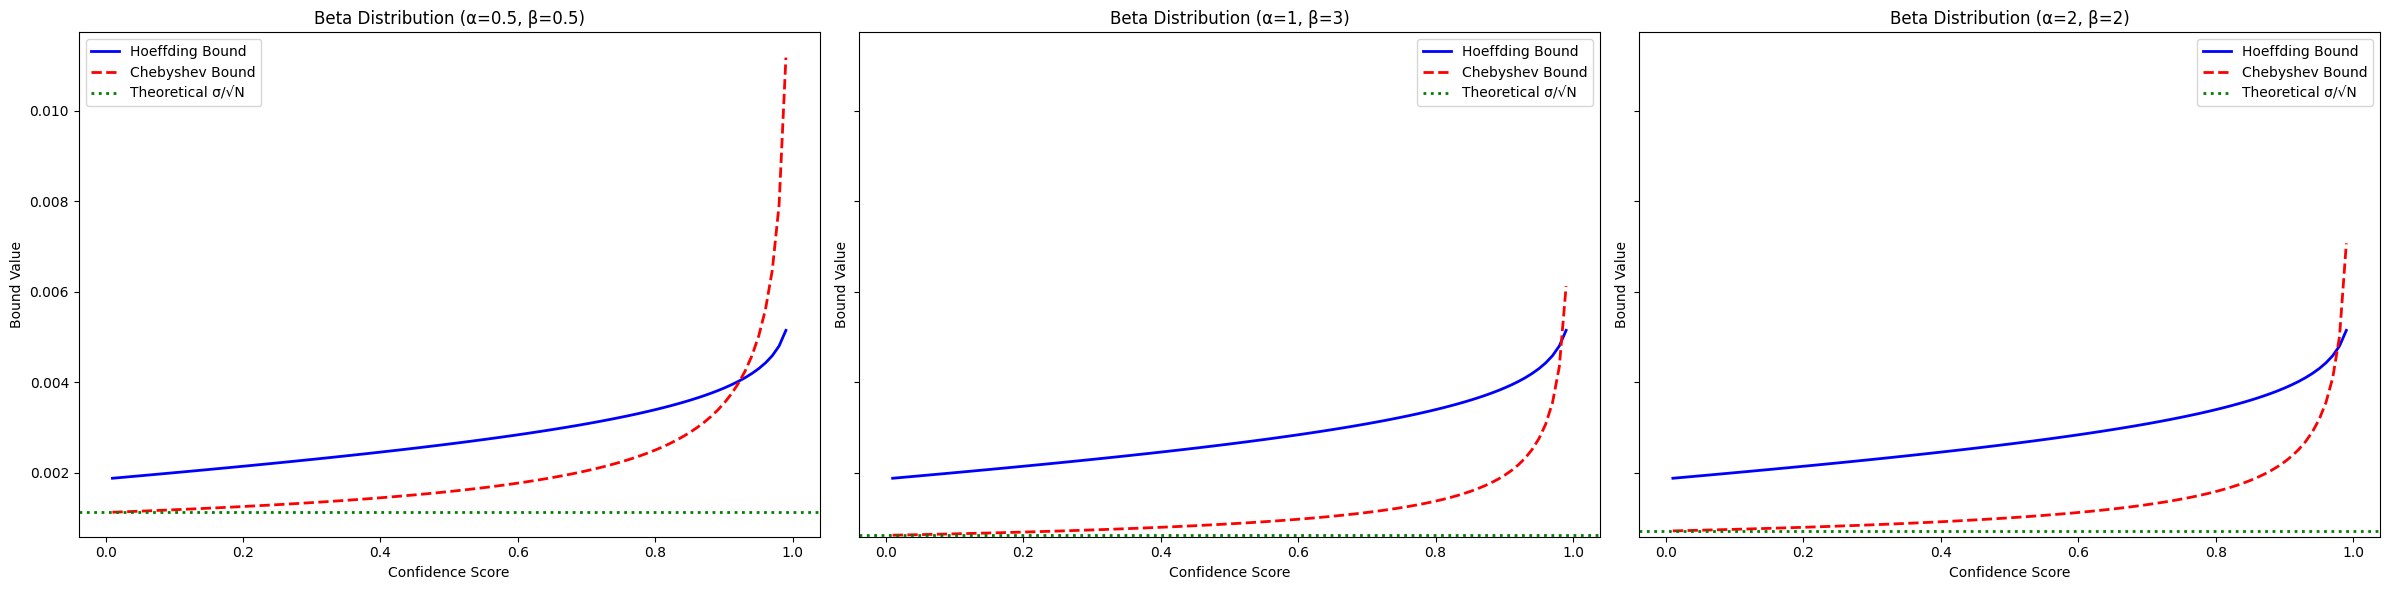

In [101]:
# Beta Distributions Comparison
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

# Beta Distribution Dataset 1
theo_std_beta1 = beta1_desvest / np.sqrt(N)
hoeffding_bounds_beta1 = [hoeffding_bound(0, 1, N, 1 - cs) for cs in confidence_scores]
chebyshev_bounds_beta1 = [chebyshev_bound(beta1_desvest, N, 1 - cs) for cs in confidence_scores]

# Beta Distribution Dataset 2
theo_std_beta2 = beta2_desvest / np.sqrt(N)
hoeffding_bounds_beta2 = [hoeffding_bound(0, 1, N, 1 - cs) for cs in confidence_scores]
chebyshev_bounds_beta2 = [chebyshev_bound(beta2_desvest, N, 1 - cs) for cs in confidence_scores]

# Beta Distribution Dataset 3
theo_std_beta3 = beta3_desvest / np.sqrt(N)
hoeffding_bounds_beta3 = [hoeffding_bound(0, 1, N, 1 - cs) for cs in confidence_scores]
chebyshev_bounds_beta3 = [chebyshev_bound(beta3_desvest, N, 1 - cs) for cs in confidence_scores]

# Calculate y-limits before plotting (all the same to see that the have the same Hoeffding bound)
all_bounds = (hoeffding_bounds_beta1 + chebyshev_bounds_beta1 + 
              hoeffding_bounds_beta2 + chebyshev_bounds_beta2 + 
              hoeffding_bounds_beta3 + chebyshev_bounds_beta3 +
              [theo_std_beta1, theo_std_beta2, theo_std_beta3])
y_min = min(all_bounds) * 0.95  
y_max = max(all_bounds) * 1.05  

# Plot Dataset 1
ax1.plot(confidence_scores, hoeffding_bounds_beta1, 'b-', linewidth=2, label='Hoeffding Bound')
ax1.plot(confidence_scores, chebyshev_bounds_beta1, 'r--', linewidth=2, label='Chebyshev Bound')
ax1.axhline(y=theo_std_beta1, color='green', linestyle=':', linewidth=2, label='Theoretical σ/√N')
ax1.set_xlabel('Confidence Score')
ax1.set_ylabel('Bound Value')
ax1.set_title(f'Beta Distribution (α={alpha1}, β={beta1})')
ax1.legend()
ax1.set_ylim(y_min, y_max)

# Plot Dataset 2
ax2.plot(confidence_scores, hoeffding_bounds_beta2, 'b-', linewidth=2, label='Hoeffding Bound')
ax2.plot(confidence_scores, chebyshev_bounds_beta2, 'r--', linewidth=2, label='Chebyshev Bound')
ax2.axhline(y=theo_std_beta2, color='green', linestyle=':', linewidth=2, label='Theoretical σ/√N')
ax2.set_xlabel('Confidence Score')
ax2.set_ylabel('Bound Value')
ax2.set_title(f'Beta Distribution (α={alpha2}, β={beta2})')
ax2.legend()
ax2.set_ylim(y_min, y_max)

# Plot Dataset 3
ax3.plot(confidence_scores, hoeffding_bounds_beta3, 'b-', linewidth=2, label='Hoeffding Bound')
ax3.plot(confidence_scores, chebyshev_bounds_beta3, 'r--', linewidth=2, label='Chebyshev Bound')
ax3.axhline(y=theo_std_beta3, color='green', linestyle=':', linewidth=2, label='Theoretical σ/√N')
ax3.set_xlabel('Confidence Score')
ax3.set_ylabel('Bound Value')
ax3.set_title(f'Beta Distribution (α={alpha3}, β={beta3})')
ax3.legend()
ax3.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

#### **Problem 2: Comparing experimental results with the theoretical bounds**

In this section, we validate our theoretical bounds (Hoeffding and Chebyshev) against empirical results from our datasets. Since we generated `nreps` independent runs of each distribution, we can compute the sample mean for each run and compare it with the true expected value.

The goal is to verify that the proportion of runs where the estimation error falls within the theoretical bounds matches our chosen confidence level. Specifically, for each run $j$:

$$\left|\overline{X}_j - \mathbb{E}[X]\right| \leq \epsilon_{\text{bound}}$$

should hold with probability at least $1 - $ `confidence`. By counting how many runs satisfy this inequality across all `nreps` repetitions, we can empirically validate whether the theoretical guarantees hold in practice.

In [102]:
def get_empirical_error(dataset, theoretical_mean):
    sample_means = np.mean(dataset, axis=1)
    errors = np.abs(sample_means - theoretical_mean)
    return errors

def verify_bounds(errors, bound):
    within_bound = np.sum(errors <= bound)
    proportion_within_bound = within_bound / len(errors)
    return proportion_within_bound

##### **Problem 2.1: Comparison of uniformly distributed results**

In [103]:
# Evaluate empirical errors for uniform datasets
theoretical_mean_uniform_narrow = uniform_theoretical_mean(a_unif_narrow, b_unif_narrow)
errors_uniform_narrow = get_empirical_error(uniform_narrow_dataset, theoretical_mean_uniform_narrow)

theoretical_mean_uniform_broad = uniform_theoretical_mean(a_unif_broad, b_unif_broad)
errors_uniform_broad = get_empirical_error(uniform_broad_dataset, theoretical_mean_uniform_broad)

In [104]:
# verify that the empirical results match the theoretical bounds for the uniform datasets
proportion_within_hoeffding_uniform_narrow_high = verify_bounds(errors_uniform_narrow, hoeffding_uniform_narrow_high)
proportion_within_chebyshev_uniform_narrow_high = verify_bounds(errors_uniform_narrow, chebyshev_uniform_narrow_high)  

print(f"\nUniform Narrow Dataset (confidence score = {high_confidence_score}):")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_uniform_narrow_high:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_uniform_narrow_high:.4f}.")
    
proportion_within_hoeffding_uniform_broad_high = verify_bounds(errors_uniform_broad, hoeffding_uniform_broad_high)
proportion_within_chebyshev_uniform_broad_high = verify_bounds(errors_uniform_broad, chebyshev_uniform_broad_high)

print(f"\nUniform Broad Dataset (confidence score = {high_confidence_score}):")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_uniform_broad_high:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_uniform_broad_high:.4f}.")

proportion_within_hoeffding_uniform_narrow_low = verify_bounds(errors_uniform_narrow, hoeffding_uniform_narrow_low)
proportion_within_chebyshev_uniform_narrow_low = verify_bounds(errors_uniform_narrow, chebyshev_uniform_narrow_low)

print("\n----------------------------------------------------------------")


print(f"\nUniform Narrow Dataset (confidence score = {low_confidence_score}):")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_uniform_narrow_low:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_uniform_narrow_low:.4f}.")

proportion_within_hoeffding_uniform_broad_low = verify_bounds(errors_uniform_broad, hoeffding_uniform_broad_low)
proportion_within_chebyshev_uniform_broad_low = verify_bounds(errors_uniform_broad, chebyshev_uniform_broad_low)

print(f"\nUniform Broad Dataset (confidence score = {low_confidence_score}):")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_uniform_broad_low:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_uniform_broad_low:.4f}.")


Uniform Narrow Dataset (confidence score = 0.95):
Proportion of sample means within Hoeffding bound: 1.0000.
Proportion of sample means within Chebyshev bound: 1.0000.

Uniform Broad Dataset (confidence score = 0.95):
Proportion of sample means within Hoeffding bound: 1.0000.
Proportion of sample means within Chebyshev bound: 1.0000.

----------------------------------------------------------------

Uniform Narrow Dataset (confidence score = 0.2):
Proportion of sample means within Hoeffding bound: 0.9770.
Proportion of sample means within Chebyshev bound: 0.7310.

Uniform Broad Dataset (confidence score = 0.2):
Proportion of sample means within Hoeffding bound: 0.9810.
Proportion of sample means within Chebyshev bound: 0.7360.


##### **Problem 2.2: Comparison of normally distributed results**

In [105]:
# empirical errors from normal datasets
theoretical_mean_normal_narrow = normal_theoretical_mean(mu_narrow, sigma_narrow)
errors_normal_narrow = get_empirical_error(normal_narrow_dataset, theoretical_mean_normal_narrow)

theoretical_mean_normal_broad = normal_theoretical_mean(mu_broad, sigma_broad)
errors_normal_broad = get_empirical_error(normal_broad_dataset, theoretical_mean_normal_broad)

In [106]:
# verify that the empirical results match the theoretical bounds for the normal narrow dataset
proportion_within_chebyshev_normal_narrow_high = verify_bounds(errors_normal_narrow, chebyshev_normal_narrow_high)
print(f"\nNormal Narrow Dataset (confidence score = {high_confidence_score}):")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_normal_narrow_high:.4f}.")

# verify that the empirical results match the theoretical bounds for the normal broad dataset
proportion_within_chebyshev_normal_broad_high = verify_bounds(errors_normal_broad, chebyshev_normal_broad_high)
print(f"\nNormal Broad Dataset (confidence score = {high_confidence_score}):")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_normal_broad_high:.4f}.")

print("\n----------------------------------------------------------------")

proportion_within_chebyshev_normal_narrow_low = verify_bounds(errors_normal_narrow, chebyshev_normal_narrow_low)
print(f"\nNormal Narrow Dataset (confidence score = {low_confidence_score}):")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_normal_narrow_low:.4f}.")
proportion_within_chebyshev_normal_broad_low = verify_bounds(errors_normal_broad, chebyshev_normal_broad_low)
print(f"\nNormal Broad Dataset (confidence score = {low_confidence_score}):")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_normal_broad_low:.4f}.")


Normal Narrow Dataset (confidence score = 0.95):
Proportion of sample means within Chebyshev bound: 1.0000.

Normal Broad Dataset (confidence score = 0.95):
Proportion of sample means within Chebyshev bound: 1.0000.

----------------------------------------------------------------

Normal Narrow Dataset (confidence score = 0.2):
Proportion of sample means within Chebyshev bound: 0.7410.

Normal Broad Dataset (confidence score = 0.2):
Proportion of sample means within Chebyshev bound: 0.7470.


##### **Problem 2.3: Comparison of truncated normally distributed results**

In [107]:
# we verify that the empirical results match the theoretical bounds for the clipped normal datasets
proportion_within_hoeffding_clipped_normal_narrow_high = verify_bounds(errors_normal_narrow, hoeffding_clipped_normal_narrow_high)    

print(f"\nClipped Normal Narrow Dataset (confidence score = {high_confidence_score}):")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_clipped_normal_narrow_high:.4f}.")

proportion_within_hoeffding_clipped_normal_broad = verify_bounds(errors_normal_broad, hoeffding_clipped_normal_broad_high)    
print(f"\nClipped Normal Broad Dataset (confidence score = {high_confidence_score}):")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_clipped_normal_broad:.4f}.")

print("\n----------------------------------------------------------------")

proportion_within_hoeffding_clipped_normal_narrow_low = verify_bounds(errors_normal_narrow, hoeffding_clipped_normal_narrow_low)
print(f"\nClipped Normal Narrow Dataset (confidence score = {low_confidence_score}):")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_clipped_normal_narrow_low:.4f}.")

proportion_within_hoeffding_clipped_normal_broad_low = verify_bounds(errors_normal_broad, hoeffding_clipped_normal_broad_low)
print(f"\nClipped Normal Broad Dataset (confidence score = {low_confidence_score}):")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_clipped_normal_broad_low:.4f}.")



Clipped Normal Narrow Dataset (confidence score = 0.95):
Proportion of sample means within Hoeffding bound: 1.0000.

Clipped Normal Broad Dataset (confidence score = 0.95):
Proportion of sample means within Hoeffding bound: 1.0000.

----------------------------------------------------------------

Clipped Normal Narrow Dataset (confidence score = 0.2):
Proportion of sample means within Hoeffding bound: 1.0000.

Clipped Normal Broad Dataset (confidence score = 0.2):
Proportion of sample means within Hoeffding bound: 1.0000.


##### **Problem 2.4: Comparison of beta distributed results**

In [108]:
# Evaluate empirical errors for beta datasets
theoretical_mean_beta1 = beta_theoretical_mean(alpha1, beta1)
errors_beta1 = get_empirical_error(beta_dataset1, theoretical_mean_beta1)

theoretical_mean_beta2 = beta_theoretical_mean(alpha2, beta2)
errors_beta2 = get_empirical_error(beta_dataset2, theoretical_mean_beta2)

theoretical_mean_beta3 = beta_theoretical_mean(alpha3, beta3)
errors_beta3 = get_empirical_error(beta_dataset3, theoretical_mean_beta3)

In [109]:
# we verify that the empirical results match the theoretical bounds for the beta dataset 1
proportion_within_hoeffding_beta1_high = verify_bounds(errors_beta1, hoeffding_beta1_high)
proportion_within_chebyshev_beta1_high = verify_bounds(errors_beta1, chebyshev_beta1_high)  
print(f"\nBeta Dataset 1:")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_beta1_high:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_beta1_high:.4f}.")

# verify that the empirical results match the theoretical bounds for the beta dataset 2
proportion_within_hoeffding_beta2_high = verify_bounds(errors_beta2, hoeffding_beta2_high)
proportion_within_chebyshev_beta2_high = verify_bounds(errors_beta2, chebyshev_beta2_high)  
print(f"\nBeta Dataset 2:")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_beta2_high:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_beta2_high:.4f}.")

# verify that the empirical results match the theoretical bounds for the beta dataset 3
proportion_within_hoeffding_beta3_high = verify_bounds(errors_beta3, hoeffding_beta3_high)
proportion_within_chebyshev_beta3_high = verify_bounds(errors_beta3, chebyshev_beta3_high)  
print(f"\nBeta Dataset 3:")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_beta3_high:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_beta3_high:.4f}.")


print("\n----------------------------------------------------------------")


proportion_within_hoeffding_beta1_low = verify_bounds(errors_beta1, hoeffding_beta1_low)
proportion_within_chebyshev_beta1_low = verify_bounds(errors_beta1, chebyshev_beta1_low)  
print(f"\nBeta Dataset 1:")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_beta1_low:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_beta1_low:.4f}.")

proportion_within_hoeffding_beta2_low = verify_bounds(errors_beta2, hoeffding_beta2_low)
proportion_within_chebyshev_beta2_low = verify_bounds(errors_beta2, chebyshev_beta2_low)  
print(f"\nBeta Dataset 2:")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_beta2_low:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_beta2_low:.4f}.")


proportion_within_hoeffding_beta3_low = verify_bounds(errors_beta3, hoeffding_beta3_low)
proportion_within_chebyshev_beta3_low = verify_bounds(errors_beta3, chebyshev_beta3_low)  
print(f"\nBeta Dataset 3:")
print(f"Proportion of sample means within Hoeffding bound: {proportion_within_hoeffding_beta3_low:.4f}.")
print(f"Proportion of sample means within Chebyshev bound: {proportion_within_chebyshev_beta3_low:.4f}.")


Beta Dataset 1:
Proportion of sample means within Hoeffding bound: 1.0000.
Proportion of sample means within Chebyshev bound: 1.0000.

Beta Dataset 2:
Proportion of sample means within Hoeffding bound: 1.0000.
Proportion of sample means within Chebyshev bound: 1.0000.

Beta Dataset 3:
Proportion of sample means within Hoeffding bound: 1.0000.
Proportion of sample means within Chebyshev bound: 1.0000.

----------------------------------------------------------------

Beta Dataset 1:
Proportion of sample means within Hoeffding bound: 0.9480.
Proportion of sample means within Chebyshev bound: 0.7340.

Beta Dataset 2:
Proportion of sample means within Hoeffding bound: 1.0000.
Proportion of sample means within Chebyshev bound: 0.7510.

Beta Dataset 3:
Proportion of sample means within Hoeffding bound: 0.9990.
Proportion of sample means within Chebyshev bound: 0.7660.


Hoeffding and Chebyshev inequalities hold for all samples. The empirical proportions of runs within the theoretical bounds meet the requested confidence levels. Hoeffding often appears to “perform better” here, but that is a consequence of its distribution-free, support-based nature (and therefore conservative as we have seen above) rather than a genuinely tighter probabilistic guarantee compared to Chebyshev.

#### **Problem 3: For which Distributions does the 68-95-99.7 Rule Hold?**

The 68-95-99.7 rule states that for a Normal distribution about 68% of observations lie within ±1σ of the mean, about 95% within ±2σ, and about 99.7% within ±3σ. Since this rule is specific to Gaussian distributions, we expect our normally distributed samples to approximately satisfy it. In addition, to this, we have no reason to believe any other sample will satisfy it.

In [110]:
def calculate_sigma_coverage(data, n_sigmas, theo_sigma = None):
    data = data.flatten()
    mean = np.mean(data)
    if theo_sigma is not None:
        std = theo_sigma
    else:
        std = np.std(data, ddof=1)

    if isinstance(n_sigmas, (int, float)):
        lower_bound = mean - n_sigmas * std
        upper_bound = mean + n_sigmas * std
        within_bounds = np.sum((data >= lower_bound) & (data <= upper_bound))
        coverage = within_bounds / len(data)
    return coverage

In [111]:
n_sigmas_list = [1, 2, 3]

##### **Problem 3.1: 68-95-99.7 Check for Uniform Distribution**

In [112]:
print("\nUniform Narrow Dataset:")
for n_sigmas in n_sigmas_list:
    coverage = calculate_sigma_coverage(uniform_narrow_dataset, n_sigmas)
    print(f"Proportion of data within {n_sigmas} standard deviations: {coverage:.4f}")
    
print("\nUniform Broad Dataset:")
for n_sigmas in n_sigmas_list:
    coverage = calculate_sigma_coverage(uniform_broad_dataset, n_sigmas)
    print(f"Proportion of data within {n_sigmas} standard deviations: {coverage:.4f}")


Uniform Narrow Dataset:
Proportion of data within 1 standard deviations: 0.5774
Proportion of data within 2 standard deviations: 1.0000
Proportion of data within 3 standard deviations: 1.0000

Uniform Broad Dataset:
Proportion of data within 1 standard deviations: 0.5773
Proportion of data within 2 standard deviations: 1.0000
Proportion of data within 3 standard deviations: 1.0000


In [113]:
# verify the 68-95-99.7 rule for the normal datasets
print("\nNormal Narrow Dataset:")
for n_sigmas in n_sigmas_list:
    coverage = calculate_sigma_coverage(normal_narrow_dataset, n_sigmas)
    print(f"Proportion of data within {n_sigmas} standard deviations: {coverage:.4f}")

print("\nNormal Broad Dataset:")
for n_sigmas in n_sigmas_list:
    coverage = calculate_sigma_coverage(normal_broad_dataset, n_sigmas)
    print(f"Proportion of data within {n_sigmas} standard deviations: {coverage:.4f}")



Normal Narrow Dataset:
Proportion of data within 1 standard deviations: 0.6827
Proportion of data within 2 standard deviations: 0.9545
Proportion of data within 3 standard deviations: 0.9973

Normal Broad Dataset:
Proportion of data within 1 standard deviations: 0.6827
Proportion of data within 2 standard deviations: 0.9545
Proportion of data within 3 standard deviations: 0.9973


In [114]:
# verify the 68-95-99.7 rule for the beta datasets
print("\nBeta Dataset 1:")
for n_sigmas in n_sigmas_list:
    coverage = calculate_sigma_coverage(beta_dataset1, n_sigmas)
    print(f"Proportion of data within {n_sigmas} standard deviations: {coverage:.4f}")

print("\nBeta Dataset 2:")
for n_sigmas in n_sigmas_list:
    coverage = calculate_sigma_coverage(beta_dataset2, n_sigmas)
    print(f"Proportion of data within {n_sigmas} standard deviations: {coverage:.4f}")

print("\nBeta Dataset 3:")
for n_sigmas in n_sigmas_list:
    coverage = calculate_sigma_coverage(beta_dataset3, n_sigmas)
    print(f"Proportion of data within {n_sigmas} standard deviations: {coverage:.4f}")



Beta Dataset 1:
Proportion of data within 1 standard deviations: 0.4999
Proportion of data within 2 standard deviations: 1.0000
Proportion of data within 3 standard deviations: 1.0000

Beta Dataset 2:
Proportion of data within 1 standard deviations: 0.6680
Proportion of data within 2 standard deviations: 0.9523
Proportion of data within 3 standard deviations: 0.9952

Beta Dataset 3:
Proportion of data within 1 standard deviations: 0.6260
Proportion of data within 2 standard deviations: 0.9839
Proportion of data within 3 standard deviations: 1.0000


The normal datasets satisfy the 68-95-99.7 rule with great precision (which can be even better by increasing `N`). Other distributions were not expected to follow the rule and they do not. However, the  Beta(1,3) sample comes surprisingly close!